In [177]:
import pymysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout

In [178]:
_host = '168.131.39.95'
_port = 3306
_user = 'root'
_passwd = 'jslab0963'
_db = 'TYP'
db = pymysql.connect(host=_host, port=_port, user=_user, passwd=_passwd, db=_db, charset= 'utf8')
cursor = db.cursor()
typ_name = ['CHABA2', 'CHANHOM', 'GONI', 'HALOLA', 'HALONG', 'KONGREY2', 'MALAKAS', 'NAKRI2', 'NANGKA', 'NANMADOL', 'NEOGURI',
           'NORU', 'PRAPIROON', 'RUMBIA', 'SOULIK', 'TALIM', 'TRAMI', 'VONGFONG']

In [179]:
typ_lang = []
typ_long = []
WD = []
WV = []
WT = []

In [180]:
temp = []
for name in typ_name:
    sql = " SELECT * from " + name
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        typ_lang.append([row_data[1], row_data[2]])
        temp.append([row_data[3], row_data[4], row_data[5]])

print(temp)
print(typ_lang)

[[110, Decimal('26.000'), Decimal('29.000')], [115, Decimal('29.000'), Decimal('29.400')], [135, Decimal('29.000'), Decimal('29.400')], [145, Decimal('23.000'), Decimal('29.500')], [145, Decimal('26.000'), Decimal('29.500')], [150, Decimal('27.000'), Decimal('29.500')], [160, Decimal('27.000'), Decimal('29.500')], [175, Decimal('26.000'), Decimal('29.100')], [145, Decimal('30.000'), Decimal('29.500')], [190, Decimal('25.000'), Decimal('28.700')], [165, Decimal('25.000'), Decimal('28.600')], [165, Decimal('27.000'), Decimal('29.000')], [170, Decimal('35.000'), Decimal('29.400')], [170, Decimal('44.000'), Decimal('28.700')], [190, Decimal('56.000'), Decimal('28.900')], [215, Decimal('61.000'), Decimal('28.600')], [210, Decimal('56.000'), Decimal('28.900')], [215, Decimal('57.000'), Decimal('29.200')], [205, Decimal('55.000'), Decimal('29.000')], [205, Decimal('52.000'), Decimal('29.200')], [185, Decimal('50.000'), Decimal('29.100')], [205, Decimal('56.000'), Decimal('29.100')], [200, Dec

In [181]:
temp = np.asarray(temp, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
temp = scaler.fit_transform(temp)
print(len(temp))
print(temp)

x_train = temp[0:260]
x_val = temp[260:520]
x_test = temp[520:784]

typ_lang = np.asarray(typ_lang, dtype = np.float32)
print(len(typ_lang))
print(typ_lang)
y_train = typ_lang[0:260]
y_val = typ_lang[260:520]
y_test = typ_lang[520:784]

784
[[0.2857143  0.13872832 0.84939766]
 [0.3        0.15606935 0.8734939 ]
 [0.35714287 0.15606935 0.8734939 ]
 ...
 [0.87142855 0.11560693 0.        ]
 [0.85714287 0.15606935 0.01807231]
 [0.9        0.29479766 0.03614461]]
784
[[ 15.8 158.1]
 [ 15.6 156.4]
 [ 15.2 154.6]
 ...
 [ 34.5 135.6]
 [ 36.7 139.5]
 [ 39.6 143.2]]


In [182]:
db.close()

In [183]:
print(len(typ_lang))
print(len(temp))

784
784


In [184]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (-1, 3, 1))
x_val = np.reshape(x_val, (-1, 3, 1))
x_test = np.reshape(x_test, (-1, 3, 1))

In [185]:
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_train, (-1, 2))
y_test = np.reshape(y_test, (-1, 2))

In [186]:
print(x_train.shape)
print(y_train.shape)

(260, 3, 1)
(260, 2)


In [187]:
#모델 설계
data_dim = 1
timesteps = 3

model = Sequential()
model.add(LSTM(260, input_shape=(3, 1), return_sequences = True, activation = 'relu'))
model.add(LSTM(260, activation = 'relu'))
model.add(Dense(2,activation='relu'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 3, 260)            272480    
_________________________________________________________________
lstm_18 (LSTM)               (None, 260)               541840    
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 522       
Total params: 814,842
Trainable params: 814,842
Non-trainable params: 0
_________________________________________________________________
None


In [188]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=500, batch_size=10, validation_data=(x_val, y_val))
#hist = model.fit(x_train,y_train,epochs=300,batch_size=10,validation_split=0.2)

Train on 260 samples, validate on 260 samples
Epoch 1/500
260/260 [==============================] - 5s 20ms/step - loss: 9870.7317 - val_loss: 9620.2330
Epoch 2/500
260/260 [==============================] - 1s 2ms/step - loss: 5741.7866 - val_loss: 1928.0506
Epoch 3/500
260/260 [==============================] - 1s 2ms/step - loss: 781.8131 - val_loss: 440.2217
Epoch 4/500
260/260 [==============================] - 1s 2ms/step - loss: 462.0881 - val_loss: 407.2402
Epoch 5/500
260/260 [==============================] - 1s 2ms/step - loss: 409.1592 - val_loss: 291.9838
Epoch 6/500
260/260 [==============================] - 1s 2ms/step - loss: 361.0191 - val_loss: 252.4090
Epoch 7/500
260/260 [==============================] - 1s 2ms/step - loss: 323.1258 - val_loss: 217.7048
Epoch 8/500
260/260 [==============================] - 1s 2ms/step - loss: 286.9636 - val_loss: 196.8581
Epoch 9/500
260/260 [==============================] - 1s 2ms/step - loss: 241.5651 - val_loss: 167.2618
Epoc

260/260 [==============================] - 1s 3ms/step - loss: 53.9283 - val_loss: 182.0601
Epoch 79/500
260/260 [==============================] - 1s 3ms/step - loss: 53.1721 - val_loss: 180.1584
Epoch 80/500
260/260 [==============================] - 1s 2ms/step - loss: 55.4062 - val_loss: 186.2186
Epoch 81/500
260/260 [==============================] - 1s 2ms/step - loss: 56.6836 - val_loss: 183.0542
Epoch 82/500
260/260 [==============================] - 1s 2ms/step - loss: 53.1494 - val_loss: 181.2101
Epoch 83/500
260/260 [==============================] - 1s 2ms/step - loss: 52.6013 - val_loss: 181.5243
Epoch 84/500
260/260 [==============================] - 1s 2ms/step - loss: 52.3845 - val_loss: 184.1763
Epoch 85/500
260/260 [==============================] - 1s 2ms/step - loss: 66.1432 - val_loss: 191.1548
Epoch 86/500
260/260 [==============================] - 1s 2ms/step - loss: 55.9707 - val_loss: 194.7000
Epoch 87/500
260/260 [==============================] - 1s 2ms/step 

260/260 [==============================] - 1s 2ms/step - loss: 57.7657 - val_loss: 254.9894
Epoch 156/500
260/260 [==============================] - 1s 2ms/step - loss: 68.2158 - val_loss: 184.7502
Epoch 157/500
260/260 [==============================] - 1s 2ms/step - loss: 54.5072 - val_loss: 183.1021
Epoch 158/500
260/260 [==============================] - 1s 2ms/step - loss: 48.9051 - val_loss: 180.3866
Epoch 159/500
260/260 [==============================] - 1s 2ms/step - loss: 48.5267 - val_loss: 180.9128
Epoch 160/500
260/260 [==============================] - 1s 2ms/step - loss: 52.1164 - val_loss: 202.6290
Epoch 161/500
260/260 [==============================] - 1s 2ms/step - loss: 57.0942 - val_loss: 181.8376
Epoch 162/500
260/260 [==============================] - 1s 2ms/step - loss: 54.9434 - val_loss: 200.6970
Epoch 163/500
260/260 [==============================] - 1s 3ms/step - loss: 60.1015 - val_loss: 207.6241
Epoch 164/500
260/260 [==============================] - 1s 

260/260 [==============================] - 1s 2ms/step - loss: 49.0085 - val_loss: 180.2277
Epoch 233/500
260/260 [==============================] - 1s 2ms/step - loss: 52.3156 - val_loss: 174.3685
Epoch 234/500
260/260 [==============================] - 1s 2ms/step - loss: 49.7131 - val_loss: 177.7021
Epoch 235/500
260/260 [==============================] - 1s 2ms/step - loss: 46.8539 - val_loss: 177.3319
Epoch 236/500
260/260 [==============================] - 1s 2ms/step - loss: 47.8083 - val_loss: 175.8027
Epoch 237/500
260/260 [==============================] - 1s 2ms/step - loss: 50.5298 - val_loss: 173.4606
Epoch 238/500
260/260 [==============================] - 1s 2ms/step - loss: 50.6294 - val_loss: 175.4245
Epoch 239/500
260/260 [==============================] - 1s 2ms/step - loss: 53.2653 - val_loss: 175.1192
Epoch 240/500
260/260 [==============================] - 1s 2ms/step - loss: 52.1645 - val_loss: 175.7755
Epoch 241/500
260/260 [==============================] - 1s 

260/260 [==============================] - 1s 2ms/step - loss: 46.9645 - val_loss: 177.7914
Epoch 310/500
260/260 [==============================] - 1s 2ms/step - loss: 46.1029 - val_loss: 179.7543
Epoch 311/500
260/260 [==============================] - 1s 2ms/step - loss: 48.4611 - val_loss: 180.2766
Epoch 312/500
260/260 [==============================] - 1s 2ms/step - loss: 48.4597 - val_loss: 178.1593
Epoch 313/500
260/260 [==============================] - 1s 2ms/step - loss: 45.4906 - val_loss: 174.8415
Epoch 314/500
260/260 [==============================] - 1s 2ms/step - loss: 47.0316 - val_loss: 182.8829
Epoch 315/500
260/260 [==============================] - 1s 2ms/step - loss: 47.8066 - val_loss: 176.3985
Epoch 316/500
260/260 [==============================] - 1s 2ms/step - loss: 47.1527 - val_loss: 181.8123
Epoch 317/500
260/260 [==============================] - 1s 2ms/step - loss: 48.0578 - val_loss: 182.2149
Epoch 318/500
260/260 [==============================] - 1s 

260/260 [==============================] - 1s 2ms/step - loss: 44.7100 - val_loss: 182.8905
Epoch 387/500
260/260 [==============================] - 1s 2ms/step - loss: 43.6733 - val_loss: 190.3904
Epoch 388/500
260/260 [==============================] - 1s 2ms/step - loss: 45.8613 - val_loss: 179.7277
Epoch 389/500
260/260 [==============================] - 1s 2ms/step - loss: 45.2860 - val_loss: 182.2030
Epoch 390/500
260/260 [==============================] - 1s 2ms/step - loss: 47.2342 - val_loss: 182.6546
Epoch 391/500
260/260 [==============================] - 1s 2ms/step - loss: 52.4450 - val_loss: 196.9890
Epoch 392/500
260/260 [==============================] - 1s 2ms/step - loss: 44.6680 - val_loss: 176.3136
Epoch 393/500
260/260 [==============================] - 1s 2ms/step - loss: 44.4054 - val_loss: 186.8075
Epoch 394/500
260/260 [==============================] - 1s 2ms/step - loss: 47.1254 - val_loss: 182.9529
Epoch 395/500
260/260 [==============================] - 1s 

260/260 [==============================] - 1s 2ms/step - loss: 45.1388 - val_loss: 183.6029
Epoch 464/500
260/260 [==============================] - 1s 2ms/step - loss: 41.4598 - val_loss: 180.9500
Epoch 465/500
260/260 [==============================] - 1s 2ms/step - loss: 43.2434 - val_loss: 194.3659
Epoch 466/500
260/260 [==============================] - 1s 2ms/step - loss: 43.1415 - val_loss: 185.0948
Epoch 467/500
260/260 [==============================] - 1s 2ms/step - loss: 45.3337 - val_loss: 180.4474
Epoch 468/500
260/260 [==============================] - 1s 2ms/step - loss: 44.2009 - val_loss: 190.5848
Epoch 469/500
260/260 [==============================] - 1s 2ms/step - loss: 46.7056 - val_loss: 192.3260
Epoch 470/500
260/260 [==============================] - 1s 2ms/step - loss: 45.8035 - val_loss: 187.0728
Epoch 471/500
260/260 [==============================] - 1s 2ms/step - loss: 49.9891 - val_loss: 183.4965
Epoch 472/500
260/260 [==============================] - 1s 

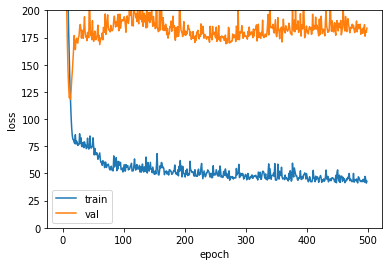

In [189]:
#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 200.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [190]:
#모델 평가
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  39.22419360234187
Validataion Score:  183.69396315354567
Test Score:  77.88410325483842


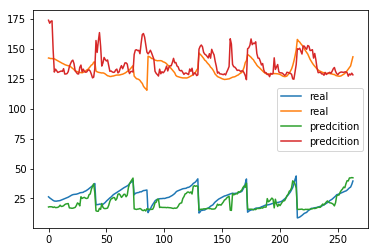

In [191]:
yhat = model.predict(x_test, verbose = 0)
plt.plot(y_test, label = "real")
plt.plot(yhat,label="predcition")
plt.legend()
plt.show()